# Intraportation eines Qubit-Zustands

Teleportation einen Qubit-Zustands innerhalb eines Schaltkreises

In [1]:
# import qiskit stuff
import qiskit
from qiskit import QuantumCircuit,execute, Aer
from qiskit.circuit import QuantumCircuit,Parameter
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram

#import python stuff
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Definition eines freien Parameters
phi = Parameter('Phi')
phi_value =  np.pi/5 

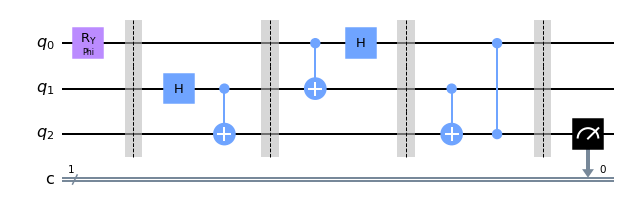

In [3]:
# Erzeugung des Schaltkreis mit
# zwei Qubits und zwei klassischen Bits
circuit = QuantumCircuit(3,1)

# Definition von |Psi>
# Drehwinkel wird später explizit festgelegt
circuit.ry(phi,0)

circuit.barrier()
# Verschränkung von q1 und q2
circuit.h(1)
circuit.cx(1,2)

circuit.barrier()

circuit.cx(0,1)
circuit.h(0)

circuit.barrier()
# Korrektur 
circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()

circuit.measure([2],[0]) # Vertausche die Messreihenfolge
circuit.draw('mpl')

In [4]:
# Setze konkreten Wert für den Parameter
circuit = circuit.bind_parameters({phi: phi_value })

{'1': 909, '0': 9091}


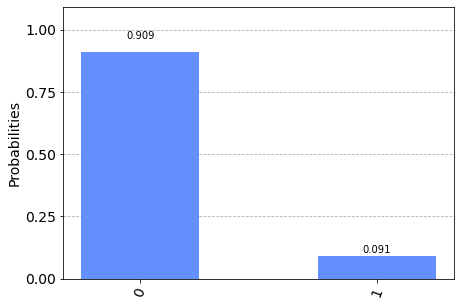

In [5]:
# Ausführen einer Simulation
backend = Aer.get_backend('qasm_simulator')

job = execute(circuit, backend, shots=10000)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)

## Visualisierung des teleportierten Zustands

Folgedes Codebeispiel zeigt durch eine Simulation den du

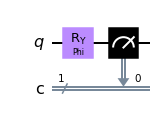

In [6]:
qubit = QuantumCircuit(1,1)

qubit.ry(phi,0)
qubit.measure([0],[0]) # Vertausche die Messreihenfolge
qubit.draw('mpl')

{'0': 9046, '1': 954}


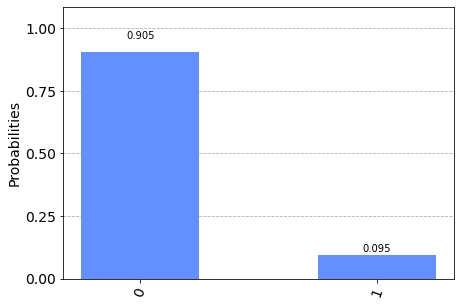

In [7]:
qubit = qubit.bind_parameters({phi: phi_value })

backend = Aer.get_backend('qasm_simulator')

job = execute(qubit, backend, shots=10000)
result = job.result()
counts = result.get_counts(qubit)
print(counts)
plot_histogram(counts)